In [ ]:
import os
os.chdir('drive/My Drive/MLProject_20202')

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df = pd.read_csv('Data/data_all_text.csv', encoding='utf-8')
df.head()

In [ ]:
# we can see that all textual data, except for title have empty rows
df.isnull().any()

title              False
location            True
company_profile     True
description         True
requirements        True
benefits            True
dtype: bool

In [ ]:
df.fillna('', inplace=True)

In [ ]:
# we try to embed all textual data except for job title
# job title will be the output/response values
# concatenated text from other columns will be input value
df['concat_text'] = df['location'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

In [ ]:
# see the longest length of each columns
for col in df.columns:
    max = 0
    max_idx = 0
    for i in df.index:
        num = len(df[col][i].split())
        if num > max:
            max = num
            max_idx = i
    print(f'{col}: {max}, {max_idx}')

title: 19, 10156
location: 22, 13181
company_profile: 890, 46
description: 2115, 4778
requirements: 1648, 4800
benefits: 719, 5866
concat_text: 2118, 4778


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

In [ ]:
def remove_punctuation(string: str):
    string = string.lower()
    apostrophe_replace = {"can't": "cannot","'s": " is", "'ve": " have", "'m": " am", "'re": " are", "n't": " not", "'d": " would", "'ll": " will"}
    for k,v in apostrophe_replace.items():
        string = re.sub(k, " " + v, string)

    # remove some padding within the text .i.e +++++++++++++++++++++ to break line 
    string = re.sub(r" *-+", r" ", string)
    string = re.sub(r"-+ ", r" ", string)
    # remove URL .i.e #URL1086asdvxcvz
    string = re.sub(r"#\w*", r"", string)
    string = re.sub(r'[^a-zA-Z0-9\-]', r' ', string)
    string = re.sub(r' +', r' ', string)

    #lemmatize to reduce vocab size
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in string.split() if word not in stop_words and len(word) > 1]
    newString = "<start> " + (" ".join(tokens)).strip() + " <end>"
    return newString

In [ ]:
df['clean_text'] = df['concat_text'].apply(lambda x: remove_punctuation(x))
df['clean_title'] = df['title'].apply(lambda x: remove_punctuation(x))

In [ ]:
df['clean_text'].head()

0    <start> u ny new york food52 created groundbre...
1    <start> nz auckland 90 second world cloud vide...
2    <start> u ia wever valor service provides work...
3    <start> u dc washington passion improving qual...
4    <start> u fl fort worth spot source solution l...
Name: clean_text, dtype: object

In [ ]:
df['clean_title'].head()

0                       <start> marketing intern <end>
1    <start> customer service cloud video productio...
2    <start> commissioning machinery assistant cma ...
3        <start> account executive washington dc <end>
4                    <start> bill review manager <end>
Name: clean_title, dtype: object

In [ ]:
df_clean = df[['clean_text', 'clean_title']]

In [ ]:
df_clean

,clean_text,clean_title
0,<start> u ny new york food52 created groundbre...,<start> marketing intern <end>
1,<start> nz auckland 90 second world cloud vide...,<start> customer service cloud video productio...
2,<start> u ia wever valor service provides work...,<start> commissioning machinery assistant cma ...
3,<start> u dc washington passion improving qual...,<start> account executive washington dc <end>
4,<start> u fl fort worth spot source solution l...,<start> bill review manager <end>
...,...,...
17875,<start> ca toronto vend looking awesome new ta...,<start> account director distribution <end>
17876,<start> u pa philadelphia web linc commerce pl...,<start> payroll accountant <end>
17877,<start> u tx houston provide full time permane...,<start> project cost control staff engineer co...
17878,<start> ng la lagos nemsia studio looking expe...,<start> graphic designer <end>


In [ ]:
df_clean.clean_text[0]

'<start> u ny new york food52 created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food52 named best food website james beard foundation iacp featured new york time npr pando daily tech crunch today show located chelsea new york city food52 fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food52 content number partner site huffington post yahoo buzzfeed various content manageme

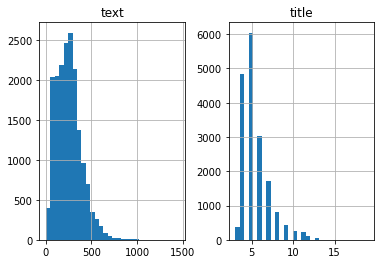

In [ ]:
import matplotlib.pyplot as plt

len_text = []
len_title = []

for i in df_clean.index:
    len_text.append(len(df_clean['clean_text'][i].split()))
    len_title.append(len(df_clean['clean_title'][i].split()))

length_df = pd.DataFrame({'text':len_text, 'title':len_title})

length_df.hist(bins = 30)
plt.show()

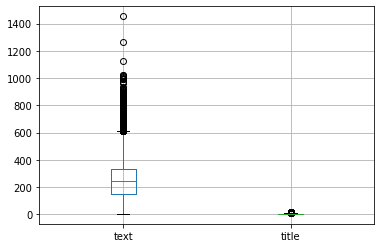

In [ ]:
length_df.boxplot()

In [ ]:
# find the appropriate length for embedding
# this prints out number of records (in percentage) with length less than the limit
for i in range(1,11):
    length_limit = 2**i
    print(f'Limit = {length_limit}')
    print(f'Text: {df_clean.clean_text[df_clean.clean_text.apply(lambda x: len(x.split())) < length_limit].count() / df_clean.shape[0]}')
    print(f'Title: {df_clean.clean_title[df_clean.clean_title.apply(lambda x: len(x.split())) < length_limit].count() / df_clean.shape[0]}')
    print()

Limit = 2
Text: 0.0
Title: 0.0

Limit = 4
Text: 0.0
Title: 0.02019015659955257

Limit = 8
Text: 0.0002796420581655481
Title: 0.8935123042505593

Limit = 16
Text: 0.0013422818791946308
Title: 0.9998881431767338

Limit = 32
Text: 0.006991051454138702
Title: 1.0

Limit = 64
Text: 0.06789709172259507
Title: 1.0

Limit = 128
Text: 0.19021252796420582
Title: 1.0

Limit = 256
Text: 0.5422818791946309
Title: 1.0

Limit = 512
Text: 0.9538590604026845
Title: 1.0

Limit = 1024
Text: 0.9997762863534676
Title: 1.0



In [ ]:
# create a dictionary
word_dict = {}

for word in df_clean.clean_text.str.cat(sep = ' ').split():
    if word not in word_dict:
        word_dict[word] = 1
    else:
        word_dict[word] += 1

for word in df_clean.clean_title.str.cat(sep = ' ').split():
    if word not in word_dict:
        word_dict[word] = 1
    else:
        word_dict[word] += 1

In [ ]:
# find the number of vocab kept if we filter out
# using the number of times each word appear
# .i.e 2 = 0.62 means 62% of vocab appear at least 2 times
for threshold in range(1,15):
    len_dict = len(word_dict)
    for k,v in word_dict.items():
        if v < threshold:
            len_dict -= 1
    print(f'{threshold}: {len_dict/len(word_dict)}')

1: 1.0
2: 0.6241527338454587
3: 0.49437415273384544
4: 0.4353140533212833
5: 0.3934929959331225
6: 0.3631495707184817
7: 0.34080433800271126
8: 0.32148666967916856
9: 0.3036601897876186
10: 0.2894713059195662
11: 0.27575689109805696
12: 0.26552191595119745
13: 0.2554902846814279
14: 0.2465205603253502


In [ ]:
# choose the number of appearances to filter = 10
# the first four are common tokens
vocab = {"<pad>": 0, "<start>": 1, "<end>": 2, "<unk>": 3}
word_num = 4

for k,v in word_dict.items():
    if k not in vocab and v >= 10:
        vocab[k] = word_num
        word_num += 1

reverse_vocab = {}
for k, v in vocab.items():
    reverse_vocab[v] = k

In [ ]:
len(vocab)

12814

In [ ]:
def text_embedding(string: str, max_len: int):
    tokenized_text = []
    tokens = string.split()
    if len(tokens) > max_len:
        tokens = tokens[:max_len]
    for word in tokens:
        if word in vocab:
            tokenized_text.append(vocab[word])
        else:
            tokenized_text.append(vocab['<unk>'])
    
    for i in range(max_len-len(tokens)):
        tokenized_text.append(vocab['<pad>'])
    return tokenized_text

In [ ]:
df_clean['embedded_text'] = df_clean['clean_text'].apply(lambda x: text_embedding(x, 512))
df_clean['embedded_title'] = df_clean['clean_title'].apply(lambda x: text_embedding(x, 16))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_embedded = df_clean[['embedded_text', 'embedded_title']]

In [ ]:
df_embedded.to_json('Data/data_text_embedded.json')

In [ ]:
import json

In [ ]:
with open('Data/dict_10.txt', 'w') as out_file:
    json.dump(vocab, out_file)

with open('Data/reverse_dict_10.txt', 'w') as out_file:
    json.dump(vocab, out_file)